In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 

plt.rcParams.update({'font.size': 18, 'axes.titlesize': 22, 'axes.labelsize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'legend.fontsize': 16})


In [2]:
def parse_name(filename):
    """
    Parse the filename of the file to extract the parameters.
    """
    # robust parameter parser: <name0>=<value0>_<name1>=<value1>...
    params = []
    curr = ''
    in_value = False
    for c in filename:
        if c == '=' and not in_value:
            curr += c
            in_value = True
        elif c == '_' and in_value:
            params.append(curr)
            curr = ''
            in_value = False
        else:
            curr += c
    if curr:
        params.append(curr)
    parsed_params = {}
    for param in params:
        name, value = param.split('=', 1)
        parsed_params[name] = value
        
    return parsed_params


def add_model_params(df, params):
    """
    Add the model parameters to the dataframe.
    """
    df['experiment'] = params.get('exp', '').replace('-', ' ')
    df['test_set'] = params.get('musdb', '')
    df['data_train'] = params.get('wav', '')
    df['repitch'] = params.get('repitch', 0.5)
    df['resample'] = params.get('resample', False)
    df['epochs'] = params.get('epochs', '')
    # set 'loss' column to either "SISDR" or "PITSISDR" if present in parameters, else ''
    if "SISDR" in params:
        df['loss'] = "SISDR"
    elif "PITSISDR" in params:
        df['loss'] = "PITSISDR"
    else:
        df['loss'] = ""
    return df

In [3]:
dfs_train = []
# for each json file in logs folder
files = sorted(glob.glob('logs/*.json'))
for filename in files:
    df = pd.read_json(filename)
    param_str = filename.split('/')[-1].replace('.json', '')
    parameters = parse_name(param_str)
    df = add_model_params(df, parameters)
    dfs_train.append(df)
    
dfs_train[0]

,train,valid,best,duration,model_size,true_model_size,compressed_model_size,experiment,test_set,data_train,repitch,resample,epochs,loss
0,12.655689,10.659958,10.659958,326.502499,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
1,8.798197,9.880945,9.880945,290.270977,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
2,8.053748,9.526105,9.526105,165.574704,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
3,7.669205,9.391258,9.391258,164.301826,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
4,7.316957,9.395396,9.391258,164.004966,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.929922,0.056502,0.056502,166.989461,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
116,0.975201,-0.100284,-0.100284,164.852545,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
117,0.967175,0.076236,-0.100284,165.566670,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
118,0.930455,-0.019072,-0.100284,162.745248,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR


In [4]:
def plot_trainig(df):
    # plot loss train valid vs index 
    plt.figure(figsize=(10, 5))
    plt.plot(df['train'], label='Train Loss')
    plt.plot(df['valid'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{df["experiment"].iloc[0]}')
    plt.legend()
    plt.grid()
    plt.xlim(0, int(df['epochs'].iloc[0]))
    plt.show()

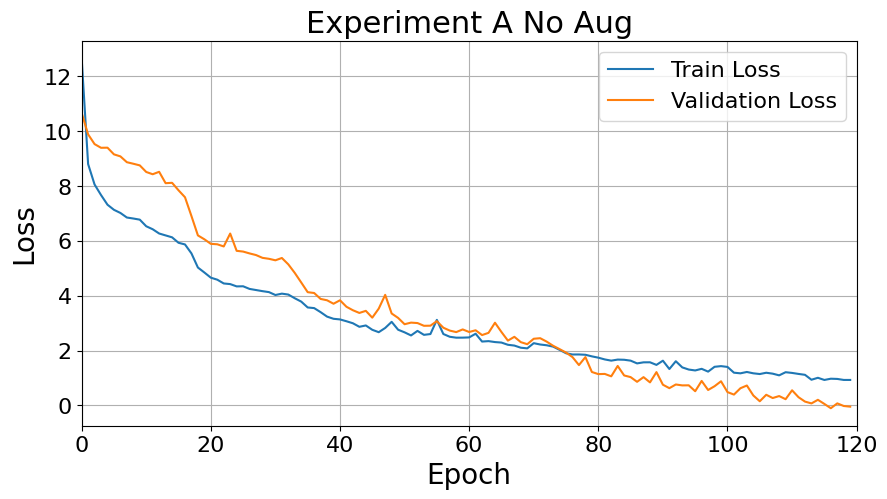

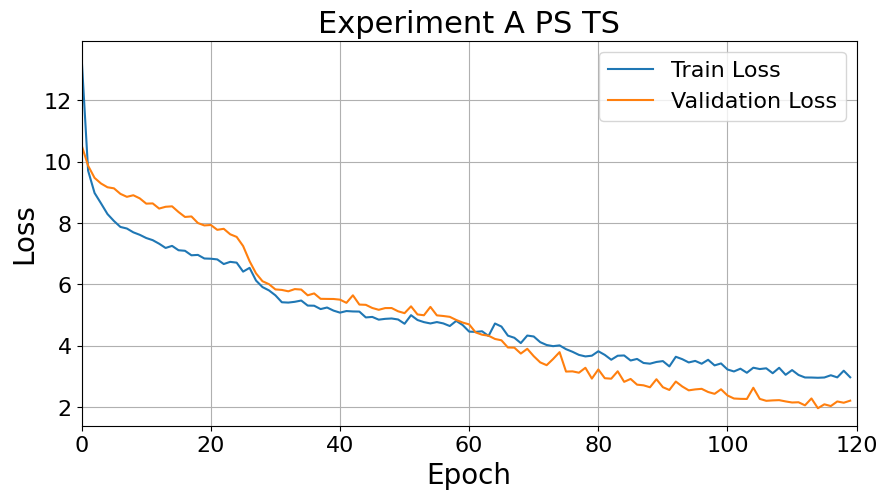

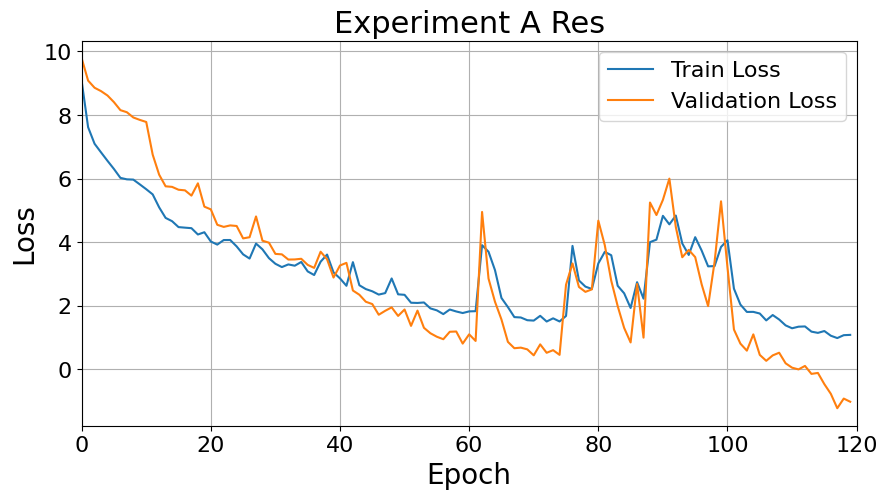

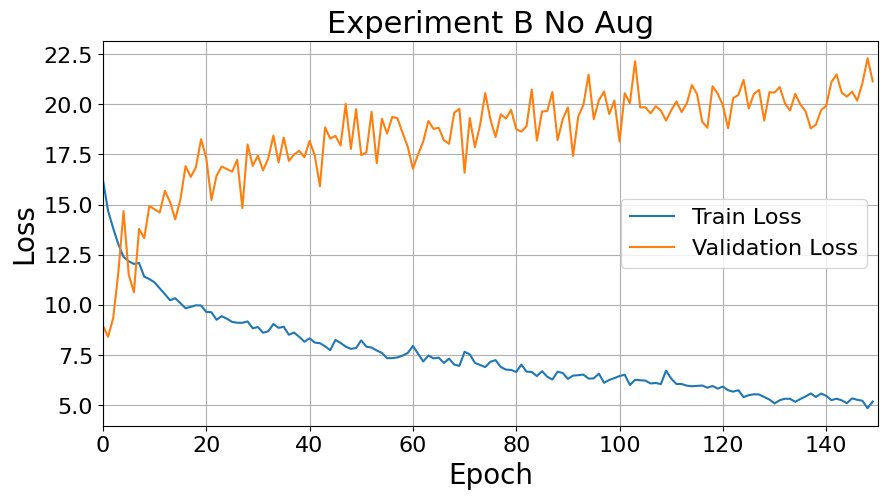

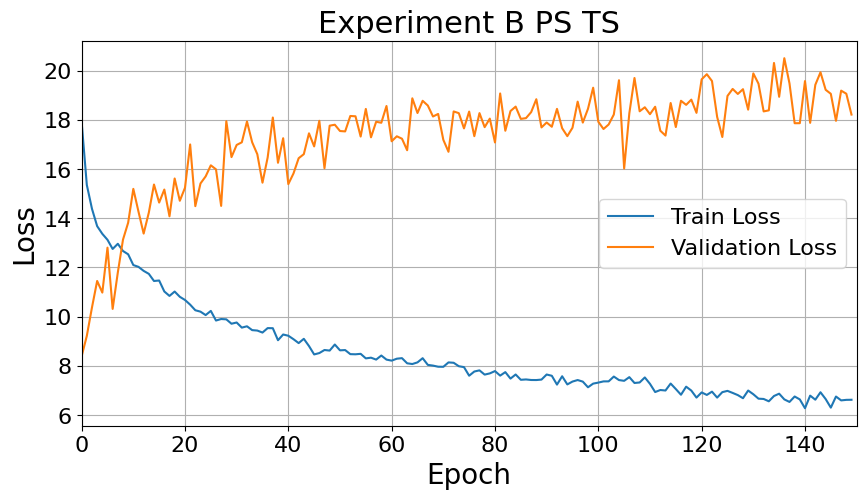

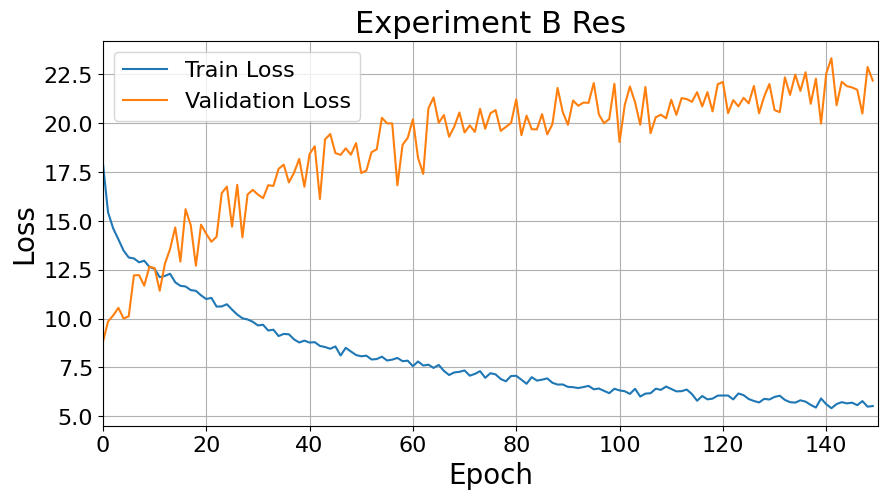

In [5]:
for df in dfs_train:
    plot_trainig(df)

In [6]:
dfs_valid = []
# for each json file in logs folder
files = sorted(glob.glob('evals/**/results/metrics.csv'))
for filename in files:
    df = pd.read_csv(filename)
    param_str = filename.split('/')[-3]
    parameters = parse_name(param_str)
    df = add_model_params(df, parameters)
    dfs_valid.append(df)
    
dfs_valid[0]

# concat all dataframes
dfs_valid = pd.concat(dfs_valid, ignore_index=True)


dfs_valid_A = dfs_valid[dfs_valid['loss'] == 'SISDR']
dfs_valid_A.loc[:, 'experiment'] = dfs_valid_A['experiment'].str.replace('Experiment A', '')

dfs_valid_B = dfs_valid[dfs_valid['loss'] == 'PITSISDR']
dfs_valid_B.loc[:, 'experiment'] = dfs_valid_B['experiment'].str.replace('Experiment B', '')

dfs_valid_A

,input_si_sdr,input_stoi,input_pesq,si_sdr,stoi,pesq,id,experiment,test_set,data_train,repitch,resample,epochs,loss
0,-23.146973,0.705893,1.814965,-33.007938,0.509305,1.923737,0,No Aug,noaug,mad,0.0,False,120,SISDR
1,-26.433362,0.724544,2.884409,-35.009849,0.536257,1.871452,1,No Aug,noaug,mad,0.0,False,120,SISDR
2,-38.918790,0.554195,2.126046,-54.669171,0.359308,2.004828,2,No Aug,noaug,mad,0.0,False,120,SISDR
3,-24.652229,0.743914,1.695867,-32.371759,0.554751,2.022819,3,No Aug,noaug,mad,0.0,False,120,SISDR
4,-38.233509,0.602971,3.266510,-45.272700,0.473965,1.992770,4,No Aug,noaug,mad,0.0,False,120,SISDR
5,-10.653380,0.882528,1.718583,-28.390382,0.659632,1.366382,5,No Aug,noaug,mad,0.0,False,120,SISDR
6,-24.451715,0.772252,2.049184,-32.261111,0.634317,1.880571,6,No Aug,noaug,mad,0.0,False,120,SISDR
7,-25.605293,0.761262,2.050208,-40.451786,0.544511,1.522575,7,No Aug,noaug,mad,0.0,False,120,SISDR
8,-34.459590,0.584658,2.052912,-36.231789,0.507353,2.053159,8,No Aug,noaug,mad,0.0,False,120,SISDR
9,-35.807430,0.528934,1.673865,-39.636454,0.489849,1.683266,9,No Aug,noaug,mad,0.0,False,120,SISDR


In [7]:
# average si_sdr, sdr, sir, sar, stoi, pesq for each experiment
dfs_valid_A_agg = dfs_valid_A.groupby(['experiment']).agg({
    'si_sdr': ['mean', 'std'],
    'stoi': ['mean', 'std'],
    'pesq': ['mean', 'std']
}).reset_index()

dfs_valid_A_agg

experiment     si_sdr                 stoi                pesq          
                   mean        std      mean       std      mean       std
0     No Aug -34.571906   9.764171  0.542756  0.100660  1.925485  0.320807
1      PS TS -32.393350  11.495928  0.551184  0.109871  1.873691  0.333419
2        Res -35.977022  11.771267  0.521752  0.112903  1.841271  0.369348

In [8]:
# average si_sdr, sdr, sir, sar, stoi, pesq for each experiment
dfs_valid_B_agg = dfs_valid_B.groupby(['experiment']).agg({
    'si_sdr': ['mean', 'std'],
    'stoi': ['mean', 'std'],
    'pesq': ['mean', 'std']
}).reset_index()

dfs_valid_B_agg

experiment    si_sdr                 stoi                pesq          
                  mean        std      mean       std      mean       std
0     No Aug  3.533440  10.305220  0.893335  0.101895  2.569411  0.535074
1      PS TS  3.171615   9.401619  0.885704  0.094357  2.464024  0.499366
2        Res  4.571066   9.920759  0.895384  0.105468  2.603960  0.480517

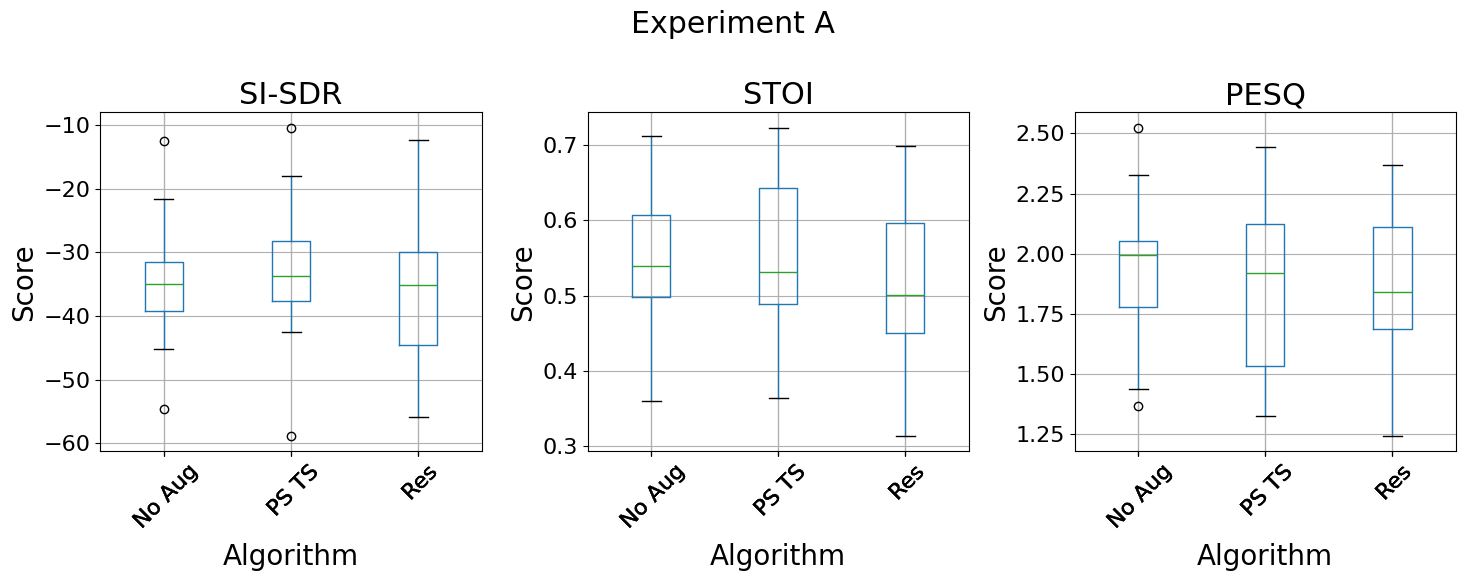

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True)

# Boxplot for si_sdr
dfs_valid_A.boxplot(by='experiment', column='si_sdr', rot=45, ax=axes[0])
axes[0].set_title('SI-SDR')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Score')

# Boxplot for stoi
dfs_valid_A.boxplot(by='experiment', column='stoi', rot=45, ax=axes[1])
axes[1].set_title('STOI')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Score')

# Boxplot for pesq
dfs_valid_A.boxplot(by='experiment', column='pesq', rot=45, ax=axes[2])
axes[2].set_title('PESQ')
axes[2].set_xlabel('Algorithm')
axes[2].set_ylabel('Score')

plt.suptitle('Experiment A')

plt.tight_layout()
plt.show()

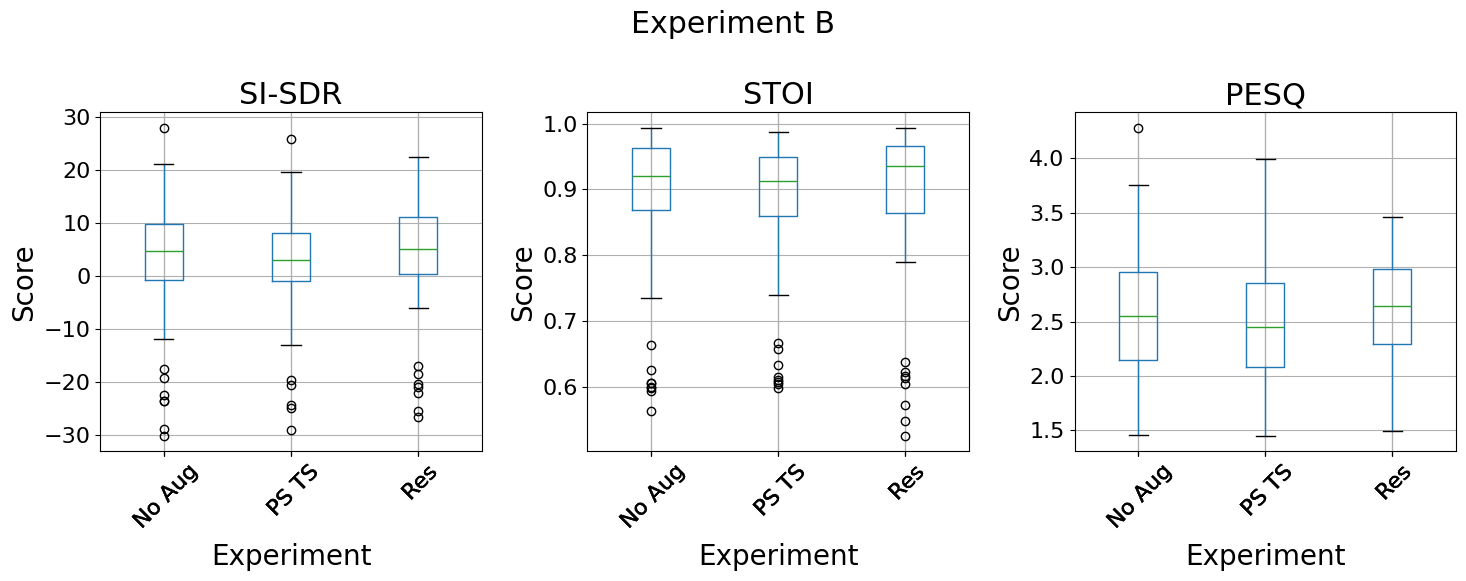

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True)

# Boxplot for si_sdr
dfs_valid_B.boxplot(by='experiment', column='si_sdr', rot=45, ax=axes[0])
axes[0].set_title('SI-SDR')
axes[0].set_xlabel('Experiment')
axes[0].set_ylabel('Score')

# Boxplot for stoi
dfs_valid_B.boxplot(by='experiment', column='stoi', rot=45, ax=axes[1])
axes[1].set_title('STOI')
axes[1].set_xlabel('Experiment')
axes[1].set_ylabel('Score')

# Boxplot for pesq
dfs_valid_B.boxplot(by='experiment', column='pesq', rot=45, ax=axes[2])
axes[2].set_title('PESQ')
axes[2].set_xlabel('Experiment')
axes[2].set_ylabel('Score')

plt.suptitle('Experiment B')
plt.tight_layout()
plt.show()